<a href="https://colab.research.google.com/github/Rafael-Souz/busca_estimativa_gulosa_ambiciosa/blob/main/busca_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementação busca por estimativa/gulosa/ambiciosa

In [ ]:
from collections import defaultdict as dicionario

In [ ]:
class BuscaEstimativa:
  def __init__(self):
    self.grafo = dicionario(list)
    self.__indice_peso = 1

  def adicionar_aresta(self, origem, destino, peso):
    self.grafo[origem].append([destino, peso])
  
  def criterio_ordenacao(self, criterio):
    return criterio[self.__indice_peso]

  def funcao_auxiliar(self, no_pai, visitados):
    visitados.add(no_pai)
    print(no_pai)

    self.grafo[no_pai].sort(key=self.criterio_ordenacao)
    for vertice in self.grafo[no_pai]:
      # Pegar o nó filho
      no_filho = vertice[0]
      if no_filho not in visitados:
        self.funcao_auxiliar(no_filho, visitados)

  def busca_estimativa(self, no_raiz):
    visitados = set()
    self.funcao_auxiliar(no_pai=no_raiz, visitados=visitados)

## Grafo a ser utilizado

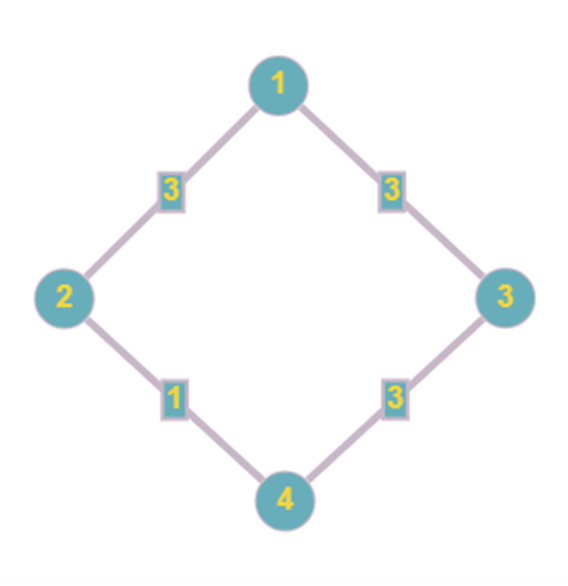

In [ ]:
busca_estimativa = BuscaEstimativa()
# Nó 1
busca_estimativa.adicionar_aresta(origem=1, destino=2, peso=3)
busca_estimativa.adicionar_aresta(origem=1, destino=2, peso=3)
# Nó 2
busca_estimativa.adicionar_aresta(origem=2, destino=1, peso=3)
busca_estimativa.adicionar_aresta(origem=2, destino=4, peso=1)
# Nó 3
busca_estimativa.adicionar_aresta(origem=3, destino=1, peso=3)
busca_estimativa.adicionar_aresta(origem=3, destino=4, peso=3)
# Nó 4
busca_estimativa.adicionar_aresta(origem=4, destino=2, peso=1)
busca_estimativa.adicionar_aresta(origem=4, destino=3, peso=3)

In [ ]:
inicio = 1
print("Realizando a busca por estimativa em todo o grafo")
busca_estimativa.busca_estimativa(no_raiz=inicio)

Realizando a busca por estimativa em todo o grafo
1
2
4
3


### Exemplos da aula

In [ ]:
exemplo_dicionario = dicionario(list)

In [ ]:
exemplo_dicionario

defaultdict(list, {})

In [ ]:
origem = 1
destino = 2
peso = 3
exemplo_dicionario[origem].append([destino, peso])

In [ ]:
exemplo_dicionario[origem].append([3, 3])
# defaultdict(list, {1: [[2, 3]]})

In [ ]:
exemplo_dicionario = []
# defaultdict(list, {1: [[2, 3], [3, 3]]})

In [ ]:
exemplo_dicionario[1].append([3, 2])
exemplo_dicionario[1].append([4, 1])
exemplo_dicionario[1].append([2, 6])

In [ ]:
exemplo_dicionario
# defaultdict(list, {1: [[3, 2], [4, 1], [2, 6]]})

defaultdict(list, {1: [[3, 2], [4, 1], [2, 6]]})

In [ ]:
exemplo_dicionario[1].sort()

In [ ]:
exemplo_dicionario
# defaultdict(list, {1: [[2, 6], [3, 2], [4, 1]]})

defaultdict(list, {1: [[2, 6], [3, 2], [4, 1]]})


# ---



---



# Busca por menor custo (Uniforme)

In [ ]:
class BuscaUniforme:
  def __init__(self, grafo, custo):
    self.grafo = grafo
    self.custo = custo

  # Função principal da busca e não utiliza função recursiva
  def busca_uniforme(self, inicio, objetivo):
    """
    É um lista responsável por armazenar os nós visitados 
    que fazem ou irão fazer parte do caminho completo (solução)
    """
    menor_caminho = []
    # Cria uma fila prioritária (É usada para saber quem será o próximo)
    fila = []
    # Mapa é um tipo de dicionário
    visitados = {}
    for obj in range(len(objetivo)):
      menor_caminho.append(20**5)
    
    # Insere o nó inicial na fila (Nó raiz)
    fila.append([0, inicio])
    
    contador = 0
    # Enquanto a fila não estiver vazia eu 
    # faço a busca pelo nó com o menor caminho
    while(len(fila)>0):
      # Pegar o elemento com o menor valor
      fila = sorted(fila)
      no_em_visita = fila[-1]
      # Retira o elemento da fila
      del fila[-1]
      no_em_visita[0] *= -1

      if no_em_visita[1] in objetivo:
        # Pega a posição
        index = objetivo.index(no_em_visita[1])

        if(menor_caminho[index] == 20**5):
          contador += 1

        # Verifica se o custo é menor, caso seja, será trocado
        if menor_caminho[index] > no_em_visita[0]:
          menor_caminho[index] = no_em_visita[0]
        
        # Retiro da fila
        del fila[-1]
        fila = sorted(fila)
        if contador == len(objetivo):
          return menor_caminho

      # Verifica os nós que não foram visitados e que são 
      # vizinhos do nó atual (seja nó raiz ou nó pai)
      if no_em_visita[1] not in visitados:
        for i in range(len(self.grafo[no_em_visita[1]])):
          # Pega o vértice atual
          vertice_atual = self.grafo[no_em_visita[1]][i]
          custo_atual = custo[(no_em_visita[1], vertice_atual)]
          fila.append([(no_em_visita[0] + custo_atual)* -1, vertice_atual])
      visitados[no_em_visita[1]] = 1
    return menor_caminho

### Grafo onde será feita a busca
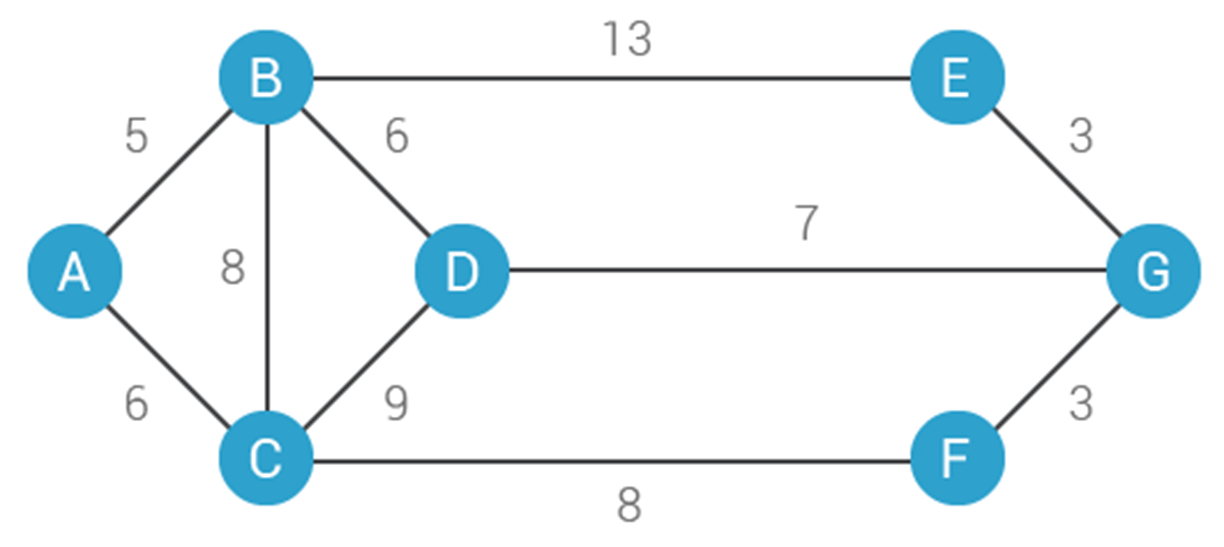

In [ ]:
grafo,custo = [[] for i in range(8)],{}
# add edge
# A
grafo[0].append(1)
grafo[0].append(2)
#B
grafo[1].append(0)
grafo[1].append(2)
grafo[1].append(3)
grafo[1].append(4)
#C
grafo[2].append(1)
grafo[2].append(3)
grafo[2].append(5)
#D
grafo[3].append(1)
grafo[3].append(2)
grafo[3].append(6)
#E
grafo[4].append(1)
grafo[4].append(6)
#F
grafo[5].append(2)
grafo[5].append(6)
#G
grafo[6].append(3)
grafo[6].append(4)
grafo[6].append(5)

# add the custo
custo[(0, 1)] = 5
custo[(0, 2)] = 6
custo[(1, 0)] = 5
custo[(1, 2)] = 8
custo[(1, 3)] = 6
custo[(1, 4)] = 13
custo[(2, 0)] = 6
custo[(2, 1)] = 8
custo[(2, 3)] = 9
custo[(2, 5)] = 8
custo[(3, 1)] = 6
custo[(3, 2)] = 9
custo[(3, 6)] = 7
custo[(4, 1)] = 13
custo[(4, 6)] = 3
custo[(5, 2)] = 8
custo[(5, 6)] = 3
custo[(6, 3)] = 7
custo[(6, 4)] = 3
custo[(6, 5)] = 3

In [ ]:
busca_uniforme = BuscaUniforme(grafo=grafo, custo=custo)

# definir o objetivo
inicio = 0 # 0 é o A
objetivo = []
objetivo.append(6) # 6 é o G

# Pega a resposta do menor caminho
solucao = busca_uniforme.busca_uniforme(0, objetivo)

# Exibir a resposta
print("Custo mínimo de {inicio} até o {objetivo} é {solucao}"
.format(inicio=0, objetivo=6, solucao=solucao))


Custo mínimo de 0 até o 6 é [17]


### Exemplos da aula

In [ ]:
fila_exemplo = [2,3,1,5]
print(fila_exemplo)

[2, 3, 1, 5]


In [ ]:
fila_exemplo = sorted(fila_exemplo)
print(fila_exemplo)

[1, 2, 3, 5]


In [ ]:
primeiro = fila_exemplo[-1]
print(primeiro)
# DEQUE - Lista duplamente encadeada

5


# Busca A* (A star)

In [ ]:
from collections import deque 

In [ ]:
#https://pt.wikipedia.org/wiki/Deque_(estruturas_de_dados)?msclkid=78b10c4aa93711ec8d84cea465f00294

class BuscaA_Estrela:
  def __init__(self, lista_adjacente):
    self.lista_adjacente = lista_adjacente

  def pegar_vizinhos(self, no):
    return self.lista_adjacente[no]

  def heuristica(self, no):
    H = {
          'A': 10,
          'B': 8,
          'C': 6,
          'D': 7,
          'E': 2,
          'F': 1,
          'G': 0
      }
    return H[no]
  
  def busca_a_estrela(self, inicio, objetivo):
    """
    No nos_em_aberto irá ficar a lista de nós que ainda não foram
    visitados. Pois os vizinhos podem ser expandidos, porém não foram visitados.
    É a lista de nós que já foram visitados
    """
    nos_em_aberto = set([inicio])
    nos_visitados = set([])

    distancia_total = {}
    distancia_total[inicio] = 0

    mapa_nos = {}
    mapa_nos[inicio] = inicio

    while len(nos_em_aberto) > 0:
      no_atual = None

      for no in nos_em_aberto:
        custo_parcial = distancia_total[no] + self.heuristica(no)
        if no_atual == None or custo_parcial < distancia_total[no_atual] + self.heuristica(no):
          no_atual = no

      if no_atual == None:
        print("Caminho não existe - Primeira iteração")
        return None

      # Se o valor da variável do no_atual for o objetivo, então
      # iremos começar novamente.
      if no_atual == objetivo:
        refazer_caminho = []
        while mapa_nos[no_atual] != no_atual:
          refazer_caminho.append(no_atual)
          no_atual = mapa_nos[no_atual]
        
        refazer_caminho.append(inicio)
        refazer_caminho.reverse()
        print("Caminho encontrado: {}".format(refazer_caminho))
        return 

      # Para todos os vizinho em aberto (que não foram vizitados)
      # Função G
      for (vizinho, peso) in self.pegar_vizinhos(no_atual):
        # Se o nó atual não estiver em nós aberto
        if vizinho not in nos_em_aberto and vizinho not in nos_visitados:
          nos_em_aberto.add(vizinho)
          mapa_nos[vizinho] = no_atual
          distancia_total[vizinho] = distancia_total[no_atual] + peso
          continue

        # Caso contrário iremos verificar se o nó atual possui o caminho menor
        if distancia_total[vizinho] > distancia_total[no_atual] + peso:
          distancia_total[vizinho] = distancia_total[no_atual] + peso
          mapa_nos[vizinho] = no_atual

          if vizinho in nos_visitados:
            nos_visitados.remove(vizinho)
            nos_em_aberto.add(vizinho)

      # Remover no_atual dos nos_em_aberto e adiciona-lo ao nó_vizitados
      # porquê todos os seus vizinhos já foram visitados (inspecionados)
      nos_em_aberto.remove(no_atual)
      nos_visitados.add(no_atual)

    print('caminho não existe')
    return None

## Grafo a ser implementado
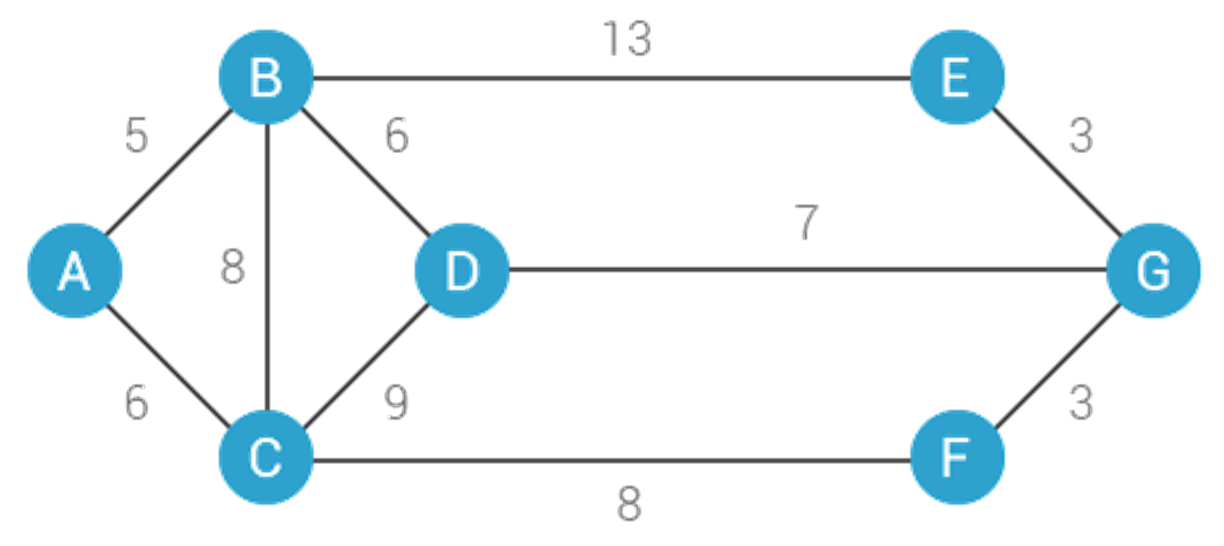

In [ ]:
# Representa um grafo
lista_adjacente = {
    'A': [('B', 5), ('C', 6)],
    'B': [('A', 5), ('C', 8), ('D', 6), ('E', 13)],
    'C': [('A', 6), ('B', 8), ('D', 9), ('F', 8)],
    'D': [('B', 6), ('C', 9), ('G', 7)],
    'E': [('B', 13), ('G', 3)],
    'F': [('C', 8), ('G', 3)],
    'G': [('D', 7), ('E', 3), ('F', 3)]
}

grafo = BuscaA_Estrela(lista_adjacente=lista_adjacente)


In [ ]:
grafo.busca_a_estrela('A', 'G')

#['A', 'C', 'F', 'G']
#['A', 'C', 'F', 'G']
#

Caminho encontrado: ['A', 'C', 'F', 'G']


['A', 'C', 'F', 'G']